<a href="https://colab.research.google.com/github/juniwarrior/crypto_trading_model/blob/main/Project_TrenMax_en_clase_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT TRENMAX 2/2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [5]:
#LEER EL PICKLE

In [6]:
df = pd.read_pickle('/content/drive/MyDrive/DS/DSC0922_data_engineering/Clases/Project TrenMax/DataCleanRenfe')

In [7]:
#PREGUNTA 1

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_DIA,FECHA_FIN_MES
PRECIO,1.000000,-0.226487,-0.231899,0.003954,-0.004402,-0.096227,0.048788,0.031322,-0.179357,-0.011263,0.030861,-0.179383
Tiempo_Viaje,-0.226487,1.000000,0.012626,0.000451,-0.006694,-0.008360,-0.183882,-0.005436,-0.002026,0.104029,-0.005256,-0.001851
Dif_Ini_Bus,-0.231899,0.012626,1.000000,0.003269,-0.000773,0.080380,0.003422,-0.027262,0.449961,0.004252,-0.027617,0.450042
FECHA_CONSULTA_HORA,0.003954,0.000451,0.003269,1.000000,-0.006020,0.010541,-0.000802,-0.004163,0.016808,-0.001147,-0.004324,0.016843
FECHA_CONSULTA_DIA,-0.004402,-0.006694,-0.000773,-0.006020,1.000000,-0.268982,-0.000831,-0.002256,-0.055747,-0.003763,-0.002497,-0.055692
FECHA_CONSULTA_MES,-0.096227,-0.008360,0.080380,0.010541,-0.268982,1.000000,-0.000633,-0.083729,0.883081,-0.006217,-0.083458,0.883031
FECHA_INICIO_HORA,0.048788,-0.183882,0.003422,-0.000802,-0.000831,-0.000633,1.000000,0.003281,-0.004650,0.724618,0.003278,-0.003875
FECHA_INICIO_DIA,0.031322,-0.005436,-0.027262,-0.004163,-0.002256,-0.083729,0.003281,1.000000,-0.292605,0.002743,0.996398,-0.291868
FECHA_INICIO_MES,-0.179357,-0.002026,0.449961,0.016808,-0.055747,0.883081,-0.004650,-0.292605,1.000000,-0.008479,-0.291792,0.999839
FECHA_FIN_HORA,-0.011263,0.104029,0.004252,-0.001147,-0.003763,-0.006217,0.724618,0.002743,-0.008479,1.000000,0.002765,-0.009821


In [9]:
del df["FECHA_FIN_HORA"]
del df["FECHA_FIN_DIA"]
del df["FECHA_FIN_MES"]

#LOS ELIMINAMOS POR TENER MISMA CORRELACION QUE FECHA_INICIO

del df["FECHA_CONSULTA_MES"]
del df["FECHA_INICIO_MES"]
#LOS ELIMINAMOS POR NO TENER VALORES DISTRIBUIDOS DURANTE TODO EL AÑO

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_DIA,FECHA_INICIO_HORA,FECHA_INICIO_DIA
PRECIO,1.000000,-0.226487,-0.231899,0.003954,-0.004402,0.048788,0.031322
Tiempo_Viaje,-0.226487,1.000000,0.012626,0.000451,-0.006694,-0.183882,-0.005436
Dif_Ini_Bus,-0.231899,0.012626,1.000000,0.003269,-0.000773,0.003422,-0.027262
FECHA_CONSULTA_HORA,0.003954,0.000451,0.003269,1.000000,-0.006020,-0.000802,-0.004163
FECHA_CONSULTA_DIA,-0.004402,-0.006694,-0.000773,-0.006020,1.000000,-0.000831,-0.002256
FECHA_INICIO_HORA,0.048788,-0.183882,0.003422,-0.000802,-0.000831,1.000000,0.003281
FECHA_INICIO_DIA,0.031322,-0.005436,-0.027262,-0.004163,-0.002256,0.003281,1.000000


In [11]:
#PREGUNTA 2

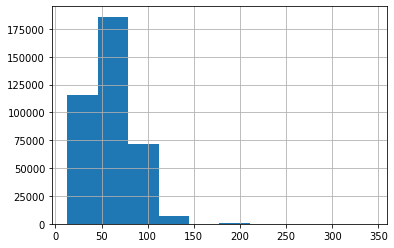

In [12]:
df.PRECIO.hist()

## VEMOS UNA DISTRIBUCIÓN CASI NORMAL PERO HACEMOS LOGPRECIO PARA QUE QUEDE "CLEAN"

In [13]:
df["LOG_PRECIO"]=np.log10(df["PRECIO"])

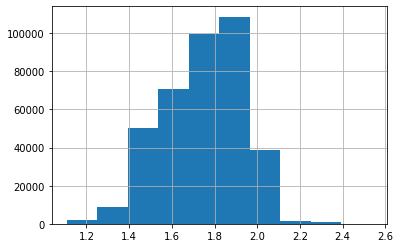

In [14]:
df.LOG_PRECIO.hist()

In [15]:
#PREGUNTA 3

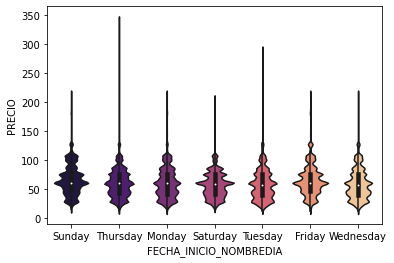

In [16]:
sns.violinplot(x="FECHA_INICIO_NOMBREDIA",y="PRECIO", data=df, palette="magma")

In [17]:
#PREGUNTA 4

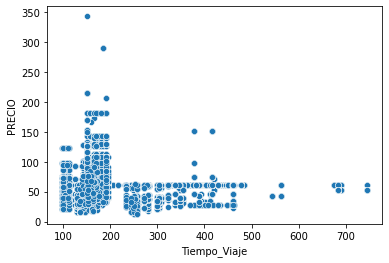

In [18]:
sns.scatterplot(x="Tiempo_Viaje",y="PRECIO", data=df)

In [19]:
#PREGUNTA 5

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381551 entries, 113 to 383550
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             381551 non-null  object 
 1   CIUDAD_DESTINO            381551 non-null  object 
 2   TIPO_TREN                 381551 non-null  object 
 3   TIPO_TARIFA               381551 non-null  object 
 4   CLASE                     381551 non-null  object 
 5   PRECIO                    381551 non-null  float64
 6   Tiempo_Viaje              381551 non-null  float64
 7   Dif_Ini_Bus               381551 non-null  float64
 8   FECHA_CONSULTA_HORA       381551 non-null  int64  
 9   FECHA_CONSULTA_NOMBREDIA  381551 non-null  object 
 10  FECHA_CONSULTA_DIA        381551 non-null  int64  
 11  FECHA_INICIO_HORA         381551 non-null  int64  
 12  FECHA_INICIO_NOMBREDIA    381551 non-null  object 
 13  FECHA_INICIO_DIA          381551 non-null 

In [21]:
del df["FECHA_CONSULTA_HORA"]
del df["FECHA_CONSULTA_NOMBREDIA"]
del df["FECHA_CONSULTA_DIA"]
del df["FECHA_FIN_NOMBREDIA"] #ESTE LO ELIMINAMOS PORQUE EXPLICA LO MISMO

## ELIMINAMOS TODAS LAS FECHAS CONSULTA PORQUE YA ESTAN EXPLICADAS EN EL DIF INI
# BUS Y ADEMÁS NO TIENEN VALORES DURANTE TODOS LOS MESES DEL AÑO




In [22]:
df_1 = df.copy()

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381551 entries, 113 to 383550
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           381551 non-null  object 
 1   CIUDAD_DESTINO          381551 non-null  object 
 2   TIPO_TREN               381551 non-null  object 
 3   TIPO_TARIFA             381551 non-null  object 
 4   CLASE                   381551 non-null  object 
 5   PRECIO                  381551 non-null  float64
 6   Tiempo_Viaje            381551 non-null  float64
 7   Dif_Ini_Bus             381551 non-null  float64
 8   FECHA_INICIO_HORA       381551 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  381551 non-null  object 
 10  FECHA_INICIO_DIA        381551 non-null  int64  
 11  LOG_PRECIO              381551 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 45.9+ MB


In [24]:
#PREGUNTA 6

In [25]:
target = [("PRECIO","LOG_PRECIO")]

In [26]:
def obtenerlistavariables(dataset):
  lista_num = []
  lista_booleans = []
  lista_cat = []
  for i in dataset:
    if (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and (i not in target) and (len(dataset[i].unique()) != 2):
      lista_num.append(i)
    elif (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and (i not in target) and (len(dataset[i].unique()) == 2):
      lista_booleans.append(i)
    elif (dataset[i].dtype.kind == "O") and i not in (target):
      lista_cat.append(i)
  return lista_num, lista_booleans, lista_cat

In [27]:
l_num, l_bool, l_cat = obtenerlistavariables(df_1)

In [28]:
l_num

['PRECIO',
 'Tiempo_Viaje',
 'Dif_Ini_Bus',
 'FECHA_INICIO_HORA',
 'FECHA_INICIO_DIA',
 'LOG_PRECIO']

In [29]:
l_bool

[]

In [30]:
l_cat

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_INICIO_NOMBREDIA']

In [31]:
print(len(df_1.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(l_cat), "variables categóricas")
print(len(l_bool), "variables boolean")
print(len(l_num), "variables numéricas")

12 total de variables
1 variable a predecir
6 variables categóricas
0 variables boolean
6 variables numéricas


In [32]:
df_1.dtypes

CIUDAD_ORIGEN              object
CIUDAD_DESTINO             object
TIPO_TREN                  object
TIPO_TARIFA                object
CLASE                      object
PRECIO                    float64
Tiempo_Viaje              float64
Dif_Ini_Bus               float64
FECHA_INICIO_HORA           int64
FECHA_INICIO_NOMBREDIA     object
FECHA_INICIO_DIA            int64
LOG_PRECIO                float64
dtype: object

In [33]:
df_2=pd.get_dummies(data=df_1, prefix=None, 
                               prefix_sep="_",
                               columns=l_cat,
                               drop_first="True")

In [34]:
df_2.head()

,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_INICIO_HORA,FECHA_INICIO_DIA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,CIUDAD_ORIGEN_VALENCIA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
113,115.65,150.0,54412.483333,18,19,2.063146,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
314,80.15,180.0,19590.116667,12,25,1.903904,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
640,85.10,165.0,43942.383333,10,12,1.929930,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1423,127.10,150.0,15613.583333,19,22,2.104146,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1922,60.30,158.0,64606.500000,19,26,1.780317,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381551 entries, 113 to 383550
Data columns (total 51 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   PRECIO                               381551 non-null  float64
 1   Tiempo_Viaje                         381551 non-null  float64
 2   Dif_Ini_Bus                          381551 non-null  float64
 3   FECHA_INICIO_HORA                    381551 non-null  float64
 4   FECHA_INICIO_DIA                     381551 non-null  float64
 5   LOG_PRECIO                           381551 non-null  float64
 6   CIUDAD_ORIGEN_MADRID                 381551 non-null  uint8  
 7   CIUDAD_ORIGEN_PONFERRADA             381551 non-null  uint8  
 8   CIUDAD_ORIGEN_SEVILLA                381551 non-null  uint8  
 9   CIUDAD_ORIGEN_VALENCIA               381551 non-null  uint8  
 10  CIUDAD_DESTINO_MADRID                381551 non-null  uint8  
 11  CIUDAD_DEST

In [35]:
#PREGUNTA 7

In [36]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_2[variable_transformar]=minMaxResultado.fit_transform(df_2[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [37]:
minMax_edad=minmaxTransformacion("Tiempo_Viaje")
minMax_edad=minmaxTransformacion("Dif_Ini_Bus")
minMax_edad=minmaxTransformacion("FECHA_INICIO_HORA")
minMax_edad=minmaxTransformacion("FECHA_INICIO_DIA")

In [38]:
df_2

,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_INICIO_HORA,FECHA_INICIO_DIA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,CIUDAD_ORIGEN_VALENCIA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
113,115.65,0.080371,0.631863,0.80,0.600000,2.063146,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
314,80.15,0.126739,0.227390,0.50,0.800000,1.903904,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
640,85.10,0.103555,0.510249,0.40,0.366667,1.929930,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1423,127.10,0.080371,0.181202,0.85,0.700000,2.104146,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1922,60.30,0.092736,0.750269,0.85,0.833333,1.780317,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383348,47.30,0.100464,0.471651,0.50,0.600000,1.674861,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
383386,76.30,0.083462,0.488315,0.40,0.633333,1.882525,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383531,53.40,0.083462,0.348907,0.40,0.366667,1.727541,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
383536,67.20,0.092736,0.874333,0.90,0.400000,1.827369,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
corr = df_2.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_INICIO_HORA,FECHA_INICIO_DIA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,CIUDAD_ORIGEN_VALENCIA,CIUDAD_DESTINO_MADRID,CIUDAD_DESTINO_PONFERRADA,CIUDAD_DESTINO_SEVILLA,CIUDAD_DESTINO_VALENCIA,TIPO_TREN_AV City,TIPO_TREN_AVE,TIPO_TREN_AVE-LD,TIPO_TREN_AVE-MD,TIPO_TREN_AVE-TGV,TIPO_TREN_INTERCITY,TIPO_TREN_LD,TIPO_TREN_LD-AVE,TIPO_TREN_LD-MD,TIPO_TREN_MD,TIPO_TREN_MD-AVE,TIPO_TREN_MD-LD,TIPO_TREN_R. EXPRES,TIPO_TREN_REGIONAL,TIPO_TREN_TRENHOTEL,TIPO_TARIFA_COD.PROMOCIONAL,TIPO_TARIFA_Doble Familiar-Flexible,TIPO_TARIFA_Flexible,TIPO_TARIFA_Grupos Ida,TIPO_TARIFA_Individual-Flexible,TIPO_TARIFA_Mesa,TIPO_TARIFA_Promo,TIPO_TARIFA_Promo +,CLASE_Cama Turista,CLASE_Preferente,CLASE_PreferenteSólo plaza H,CLASE_Turista,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
PRECIO,1.000000,-0.226487,-0.231899,0.048788,0.031322,0.965063,0.029781,-0.124130,-0.069422,-0.341084,-0.029781,-0.097446,-0.045765,-0.321369,-0.093039,0.376716,-0.056051,-0.013298,0.131942,-0.196463,-0.049221,0.000043,-0.071789,-0.012839,-0.031229,-0.124406,-0.080734,-0.298692,-0.057275,-0.003246,0.004169,0.347903,0.001619,0.020216,0.031696,-0.102835,-0.148108,0.012870,0.181797,0.019799,-0.195006,0.240114,0.001256,-0.166223,0.072350,-0.006301,-0.049601,0.093403,-0.012060,-0.058219,-0.038673
Tiempo_Viaje,-0.226487,1.000000,0.012626,-0.183882,-0.005436,-0.255844,-0.055618,0.270412,-0.076839,-0.000087,0.055618,0.162802,-0.100616,-0.027488,-0.027043,-0.605050,0.110092,0.152779,-0.011976,-0.039559,0.169594,0.067941,0.184010,0.219379,0.068009,0.261056,0.426259,0.562592,0.234407,-0.007006,0.005617,0.041517,0.000054,0.012919,-0.000500,-0.493913,0.282889,0.052566,-0.110453,-0.008859,-0.130437,-0.023891,-0.000578,0.398673,-0.022621,0.000101,0.007631,0.010132,-0.007259,0.000299,-0.004988
Dif_Ini_Bus,-0.231899,0.012626,1.000000,0.003422,-0.027262,-0.240151,-0.001627,-0.012008,0.002200,0.023282,0.001627,-0.020056,0.004119,0.023754,0.004496,-0.023879,-0.022351,-0.038928,-0.004488,0.025355,-0.013921,-0.013362,-0.023634,-0.014024,-0.006689,-0.019830,0.009612,0.057567,0.010665,-0.001041,-0.004458,-0.224786,-0.001897,-0.008426,-0.001070,0.183254,-0.032086,-0.027799,-0.067768,-0.017394,0.107738,-0.014492,-0.002494,-0.047322,-0.112479,-0.014748,0.006908,0.014623,0.003352,-0.012881,-0.000190
FECHA_INICIO_HORA,0.048788,-0.183882,0.003422,1.000000,0.003281,0.039373,0.082503,-0.130020,0.010643,-0.031139,-0.082503,0.108537,0.024999,0.051134,0.017220,0.095011,0.037724,0.027098,-0.016371,0.048074,-0.069463,-0.012521,-0.061933,-0.044238,0.032459,0.039442,-0.118844,-0.126465,-0.030016,0.000557,0.005259,0.047010,0.000971,-0.007367,-0.001634,0.046361,0.009805,0.035105,0.041414,0.012606,-0.067374,0.038649,0.001659,0.012226,0.026848,-0.035299,-0.019520,0.117468,-0.023200,-0.037193,-0.027136
FECHA_INICIO_DIA,0.031322,-0.005436,-0.027262,0.003281,1.000000,0.033282,0.009423,0.000243,-0.002585,-0.003357,-0.009423,0.009904,0.001318,0.002900,-0.000912,-0.002020,0.005813,0.008558,0.000466,0.002401,0.005178,-0.003451,0.004848,-0.002064,-0.001669,-0.003847,-0.003301,-0.008317,-0.005261,0.000013,0.000172,0.014308,-0.002020,0.004382,-0.003273,-0.008620,0.005229,0.003742,0.000268,0.002374,0.000569,-0.003775,-0.000022,0.004268,-0.006870,-0.032711,-0.023298,-0.009453,0.010484,0.004500,-0.003260
LOG_PRECIO,0.965063,-0.255844,-0.240151,0.039373,0.033282,1.000000,0.031509,-0.112467,-0.015652,-0.381341,-0.031509,-0.088442,0.012193,-0.352530,-0.071875,0.386669,-0.048565,-0.000378,0.120694,-0.232443,-0.031131,0.007769,-0.071469,-0.005263,-0.027717,-0.129756,-0.069550,-0.365628,-0.043470,-0.000249,0.003690,0.343342,0.001627,0.013084,0.014310,-0.068621,-0.154317,0.016654,0.176452,0.021735,-0.185338,0.221675,0.001370,-